# Facial Recognition and Reconstruction with Principal Component Analysis (PCA)
---

The purpose of this notebook is to walk through the linear algebra concepts required to perform principal component analysis. By the end of the notebook, you will have an understanding on what eigenfaces are, how they function, and how they can be utilized to reduce the amount of data required to store information.


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from PIL import Image

### Step 1: Load the Dataset

All 400 of our face inputs are stored in the `ATTfaces/faces/` directory as `.pgm` files. We'll put all of these images into an array, enabling us to compute calculations on the images.

Once we have our images in an easy-to-compute format, we'll display a few to show what type of information we're working with.

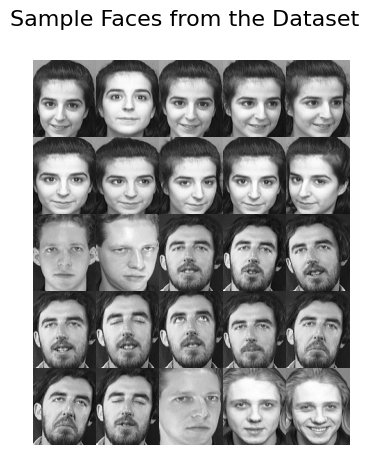

In [7]:
# Load raw images
data_dir = "ATTfaces/faces/"
file_names = os.listdir(data_dir)
images = [np.asarray(Image.open(data_dir + file_names[i])) for i in range(len(file_names))]
images = np.array(images)

# Visualize some of the faces
fig = plt.figure(figsize=(5, 5))
fig.suptitle("Sample Faces from the Dataset", fontsize=16)
grid = ImageGrid(fig, 111, nrows_ncols=(5, 5), axes_pad=0)

for ax, im in zip(grid, images[:25]):
    ax.imshow(im, cmap="gray")
    ax.axis('off')

plt.show()

### Step 2: Calculate the Mean Face

Now that we have all of the faces loaded and have seen a few, we'll calculate the mean face. The mean face is the average in the dataset across all 400 examples. Thankfully, calculating the mean isn't too tricky thanks to the libraries we're using.

Once we've caluclated the mean face, we will visualize it to see what all the dataset images have in common with one another.

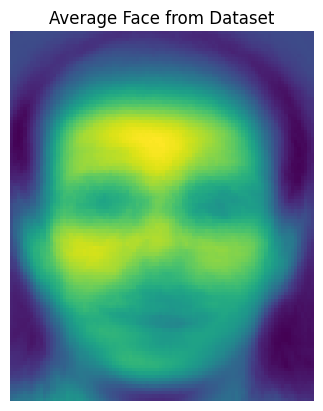

In [11]:
# Calculate the mean face
mean_face = images.mean(0)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(face_mean)
ax.axis('off')
ax.set_title("Average Face from Dataset")

plt.show()

# Principal Component Analysis (PCA)
---

Principal Component Analysis allows us to identify the most important aspects of the dataset (eigenfaces) and shrink each image to share similarities with those eigenfaces. While the process is lossy, we can retain almost all of the initial information, while greatly reducing the file size of the dataset.

### Step 3: Prepare for Eigendecompsition

We currently have our dataset loaded and in a workable format as well as our mean face from the dataset. Now, we need to prepare the data for eigendecomposition. There a few steps we need to take to prepare.

* Subtract the mean image from every image in the dataset
* Vectorize the images into a 2D matrix
* Create a covariance matrix

In [ ]:
imageAmount, height, width = images.shape

# ***Subtract the mean image from all images***
dataMinusMean = images - mean_face

# ***Vectorize the images to a 2D matrix***
print("reshaping")
dataReshape = dataMinusMean.reshape(imageAmount, height * width)
print("Reshaped Data Dimensions:", dataReshape.shape)

# ***Create the covariance matrix***
matrixCovariance = np.cov(dataReshape, rowvar=True)
print("Covariance Dimensions:", matrixCovariance.shape)

reshaping
Reshaped Data Dimensions: (400, 10304)
Covariance Dimensions: (400, 400)


### Step 4: Eigendecomposition, Eigenfaces, and Normalization

In this step, we will compute the eigendecomposition. We'll use NumPy to do this for us via a function call, which will result in the eigenvalues and eigenvectors.

Once we have those values, we can find the dot product between our reshaped data and eigenvectors to find the eigenfaces.

* We'll use 150 principal components to find the most important aspects of the images in the dataset.

Finally, we will normalize those eigenfaces to squish the values between 0 and 1.

In [14]:
# ***Compute the eigendecomposition***
print("finding eigenvalues and eigenvectors")
eigenvalues, eigenvectors = np.linalg.eig(matrixCovariance)

n_comps = 150

# ***Calculate the eigenfaces***
print("sorting data")
dataSorted = np.argsort(-eigenvalues)[:n_comps]
eigenvalues = eigenvalues[dataSorted]
eigenvectors = eigenvectors[:, dataSorted]
print("Eigenvectors Dimensions:", eigenvectors.shape)

print("finding eigenfaces")
eigenfaces = dataReshape.T @ eigenvectors
print("Eigenfaces Dimensions:", eigenfaces.shape)

# ***Normalize eigenfaces***
print("normalizing eigenfaces")
eigenfaces = eigenfaces / np.linalg.norm(eigenfaces, axis=0)

finding eigenvalues and eigenvectors
sorting data
Eigenvectors Dimensions: (400, 150)
finding eigenfaces
Eigenfaces Dimensions: (10304, 150)
normalizing eigenfaces
